In [1]:
pip install beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import re
import string
import nltk

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
stopwords.words('english')

import bs4 as bs
import urllib.request

from bs4 import BeautifulSoup

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
import pandas as pd
import random

def merge_and_shuffle_csv(file1, file2, outfile):
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)

    num_rows_df1 = len(df1)
    num_rows_df2 = len(df2)
    num_rows_to_include_from_each = min(num_rows_df1, num_rows_df2)

    if num_rows_to_include_from_each > num_rows_df1:
        df1_sampled = df1.sample(n=num_rows_to_include_from_each, replace=True, random_state=random.randint(0, 100))
        df2_sampled = df2.sample(n=num_rows_to_include_from_each, random_state=random.randint(0, 100))
    elif num_rows_to_include_from_each > num_rows_df2:
        df1_sampled = df1.sample(n=num_rows_to_include_from_each, random_state=random.randint(0, 100))
        df2_sampled = df2.sample(n=num_rows_to_include_from_each, replace=True, random_state=random.randint(0, 100))
    else:
        df1_sampled = df1.sample(n=num_rows_to_include_from_each, random_state=random.randint(0, 100))
        df2_sampled = df2.sample(n=num_rows_to_include_from_each, random_state=random.randint(0, 100))

    df_combined = pd.concat([df1_sampled, df2_sampled], ignore_index=True)

    df_shuffled = df_combined.sample(frac=1, random_state=random.randint(0, 100)).reset_index(drop=True)

    df_shuffled.to_csv(outfile, index=False)

In [4]:
def batman(sentence_list):
    dictionary = {}
    for sentence in sentence_list:
            dictionary[sentence] = "batman"
    return dictionary

def superman(sentence_list):
    dictionary = {}
    for sentence in sentence_list:
            dictionary[sentence] = "superman"
    return dictionary

In [5]:
import csv

def save_batman_csv(sentence_list, file_name):
    batman_dict = batman(sentence_list)

    with open(file_name, 'w', newline='') as csvfile:
        fieldnames = ['sentence', 'type']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        writer.writeheader()
        for sentence, is_sport in batman_dict.items():
            writer.writerow({'sentence': sentence, 'type': 'batman'})

def save_superman_csv(sentence_list, file_name):
    superman_dict = superman(sentence_list)

    with open(file_name, 'w', newline='') as csvfile:
        fieldnames = ['sentence', 'type']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

        writer.writeheader()
        for sentence, is_sport in superman_dict.items():

            writer.writerow({'sentence': sentence, 'type': 'superman'})

In [6]:
#kreiraj recenice
import nltk
nltk.download('punkt')
from nltk import sent_tokenize

def create_dataset(save_dataset, *args):
    batman_text =  ""
    superman_text = ""
    for site in args:
      #print(site)

      scraped_data = urllib.request.urlopen(site)
      link = scraped_data.read()
      parsed_articles = bs.BeautifulSoup(link, 'lxml')

      paragraphs = parsed_articles.find_all('p')
      for p in paragraphs:
        if "Batman" in site:
          batman_text += p.text
        else:
          superman_text += p.text

    batman_text = re.sub(r'\[[0-9]*\]', ' ', batman_text)
    batman_text = re.sub(r'\s+', ' ', batman_text)

    superman_text = re.sub(r'\[[0-9]*\]', ' ', superman_text)
    superman_text = re.sub(r'\s+', ' ', superman_text)

    sentence_list_batman = nltk.sent_tokenize(batman_text)
    sentence_list_superman = nltk.sent_tokenize(superman_text)
    
    #batman(sentence_list_batman)
    #superman(sentence_list_superman)
    save_batman_csv(sentence_list_batman, "batman.csv")
    save_superman_csv(sentence_list_superman, "superman.csv")

    if save_dataset == True:
      merge_and_shuffle_csv("batman.csv", "superman.csv", "dataset.csv")
    else:
      print("------")



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
create_dataset(True,'https://en.wikipedia.org/wiki/Superman', 'https://en.wikipedia.org/wiki/Batman')

In [ ]:
data1 = pd.read_csv('dataset.csv')
data1.head()

import json

with open('/content/zavrsni_ispit.json') as file:
  data2 =  json.load(file)

In [ ]:
#data1

In [ ]:
from bs4 import BeautifulSoup

cleantext = BeautifulSoup(data1["sentence"][1], 'lxml').text

cleantext = re.sub('r[^\w\s]', '', cleantext)

token = cleantext.lower().split()
stopword = set(stopwords.words('english'))
token_list = [word for word in token if word.lower() not in stopword]

" ".join(token_list)

'bird...'

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
from tqdm import tqdm

def data_cleaner(data):

  clean_data = []

  for review in tqdm(data):
    cleantext = BeautifulSoup(review, 'lxml').text
    cleantext = re.sub(r'[^\w\s]', '', cleantext)
    cleantext = [token for token in cleantext.lower().split() if token not in stopword]
    cleantext = lemmatizer.lemmatize(" ".join(cleantext))
    clean_data.append(cleantext.strip())
  
  return clean_data

In [ ]:
clean_data = data_cleaner(data1.sentence.values)

  0%|          | 1/904 [00:01<24:30,  1.63s/it]<ipython-input-16-782fd352d5ad>:8: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  cleantext = BeautifulSoup(review, 'lxml').text
100%|██████████| 904/904 [00:01<00:00, 486.58it/s]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data1, data1.type, test_size=0.2, random_state=42, stratify=data1.type)

y_train

459    superman
451      batman
201    superman
799      batman
244    superman
         ...   
139    superman
506      batman
775      batman
727    superman
835    superman
Name: type, Length: 723, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
le_test = LabelEncoder()
y_test = le_test.fit_transform(y_test)

y_train

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(723, 2) (723,)
(181, 2) (181,)


In [ ]:
clean_data_train_data = data_cleaner(X_train.sentence.values)

  0%|          | 0/723 [00:00<?, ?it/s]<ipython-input-16-782fd352d5ad>:8: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  cleantext = BeautifulSoup(review, 'lxml').text
100%|██████████| 723/723 [00:00<00:00, 2454.25it/s]


In [ ]:
X_train['cleaned_text'] = clean_data_train_data
X_train.head()

sentence      type  \
459  Wheeler-Nicholson's financial difficulties con...  superman   
451  Although Bruce Wayne leads an active romantic ...    batman   
201  In 2003, the Shuster heirs served a terminatio...  superman   
799  As a crime-fighting everyman, he shares Batman...    batman   
244  Exact sales figures for the early decades of S...  superman   

                                          cleaned_text  
459  wheelernicholsons financial difficulties conti...  
451  although bruce wayne leads active romantic lif...  
201  2003 shuster heirs served termination notice s...  
799  crimefighting everyman shares batmans goals of...  
244  exact sales figures early decades superman com...

In [ ]:
clean_data_test_data = data_cleaner(X_test.sentence.values)
X_test['cleaned_text'] = clean_data_test_data
X_test.head()

  0%|          | 0/181 [00:00<?, ?it/s]<ipython-input-16-782fd352d5ad>:8: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  cleantext = BeautifulSoup(review, 'lxml').text
100%|██████████| 181/181 [00:00<00:00, 3092.20it/s]


sentence      type  \
510  S. Rosenberg evaluated his actions and problem...    batman   
383  Deprived of many of his technological resource...    batman   
215  Despite the erratic pay, Siegel and Shuster ke...  superman   
676  Superman #5 (May 1940) carried an advertisemen...  superman   
583  To commemorate the 75th anniversary of the cha...    batman   

                                          cleaned_text  
510  rosenberg evaluated actions problems determine...  
383  deprived many technological resources batman f...  
215  despite erratic pay siegel shuster kept workin...  
676  superman 5 may 1940 carried advertisement kryp...  
583  commemorate 75th anniversary character warner ...

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vec = CountVectorizer()
vec = vec.fit(X_train.cleaned_text)
train_x_bow = vec.transform(X_train.cleaned_text)
test_x_bow = vec.transform(X_test.cleaned_text)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

In [ ]:
classifier = MultinomialNB()

In [ ]:
alpha_ranges = {
    "alpha": [0.001, 0.01, 0.1, 1, 10.0, 100]
}

In [ ]:
grid_search = GridSearchCV(classifier, param_grid=alpha_ranges, scoring='accuracy', cv=3, return_train_score=True)
grid_search.fit(train_x_bow, y_train)

grid_search.cv_results_

{'mean_fit_time': array([0.00429408, 0.00165844, 0.00171248, 0.0019331 , 0.00168467,
        0.00162896]),
 'std_fit_time': array([3.55279857e-03, 1.10960734e-05, 6.67101641e-05, 1.29059569e-04,
        7.46276812e-05, 2.13579522e-05]),
 'mean_score_time': array([0.00081134, 0.00057252, 0.00056473, 0.00071049, 0.00059152,
        0.00058564]),
 'std_score_time': array([3.09026227e-04, 2.21385769e-06, 9.97249815e-06, 1.12700305e-04,
        8.62491087e-06, 9.66763738e-06]),
 'param_alpha': masked_array(data=[0.001, 0.01, 0.1, 1, 10.0, 100],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.001},
  {'alpha': 0.01},
  {'alpha': 0.1},
  {'alpha': 1},
  {'alpha': 10.0},
  {'alpha': 100}],
 'split0_test_score': array([0.86721992, 0.88381743, 0.8879668 , 0.91286307, 0.91286307,
        0.90871369]),
 'split1_test_score': array([0.87966805, 0.89211618, 0.91286307, 0.93775934, 0.9253112 ,
        0.90871369

In [ ]:
alpha = [0.001, 0.01, 0.1, 1, 10.0, 100]

train_acc = grid_search.cv_results_['mean_train_score']
train_stdev = grid_search.cv_results_['std_train_score']

test_acc = grid_search.cv_results_['mean_test_score']
test_stdev = grid_search.cv_results_['std_test_score']

In [ ]:
import matplotlib.pyplot as plt

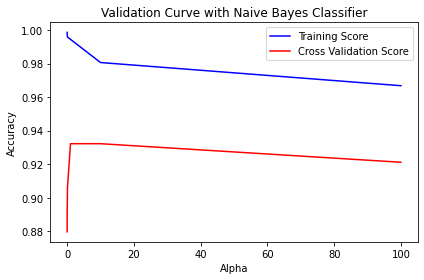

In [ ]:
plt.plot(alpha, train_acc, label="Training Score", color='b')
plt.plot(alpha, test_acc, label="Cross Validation Score", color='r')

plt.title("Validation Curve with Naive Bayes Classifier")
plt.xlabel("Alpha")
plt.ylabel("Accuracy")

plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [ ]:
grid_search.best_estimator_

MultinomialNB(alpha=10.0)

In [ ]:
classifier = MultinomialNB(alpha=0.001)
classifier.fit(train_x_bow, y_train)

MultinomialNB(alpha=0.001)

In [ ]:
predict = classifier.predict(test_x_bow)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print("Accuracy is ", accuracy_score(y_test, predict))

Accuracy is  0.9171270718232044
